In [2]:
# Import packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro, kstest, probplot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

### Load Data

In [3]:
# Open dataset
df_grade = pd.read_csv('./datasets/test_grade.csv')

In [4]:
# Check Dataset structure
df_grade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   study_hours  101 non-null    float64
 1   test_grade   101 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [5]:
# Show DF top
df_grade.head(10)

,study_hours,test_grade
0,1.1,30
1,2.0,55
2,2.5,60
3,3.6,75
4,4.2,85
5,5.0,100
6,5.5,115
7,6.1,120
8,6.5,130
9,7.2,145


In [6]:
# Show DF bottom
df_grade.tail(10)

,study_hours,test_grade
91,44.9,750
92,45.1,755
93,45.3,760
94,45.5,765
95,45.7,770
96,46.0,780
97,46.2,785
98,46.4,790
99,46.6,795
100,46.9,800


### EDA

In [7]:
# Show DF statistics
df_grade.describe()

,study_hours,test_grade
count,101.000000,101.000000
mean,28.604950,455.000000
std,14.116128,221.385411
min,1.100000,30.000000
25%,16.500000,270.000000
50%,30.900000,465.000000
75%,41.800000,655.000000
max,46.900000,800.000000


<Axes: xlabel='study_hours', ylabel='test_grade'>

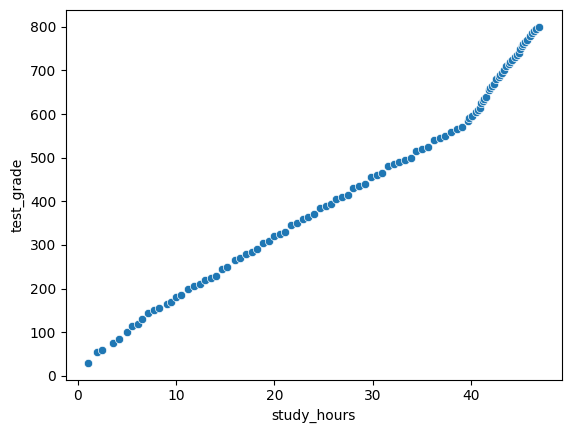

In [8]:
# Dispersal Plot
# X = Study Hours
# Y = Grade
sns.scatterplot(x='study_hours', y='test_grade', data=df_grade)

<Axes: ylabel='study_hours'>

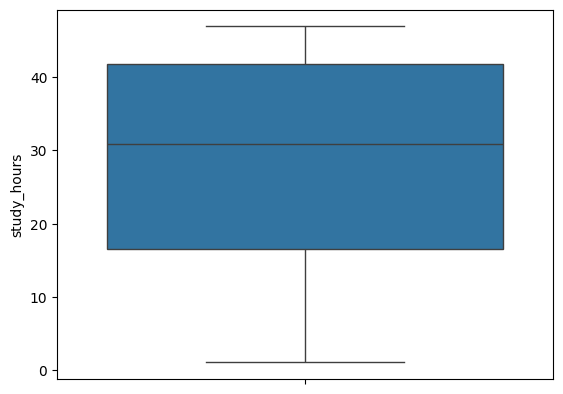

In [9]:
# Verify if we have outliers
# BoxPlot
sns.boxplot(y='study_hours', data=df_grade)

<Axes: ylabel='test_grade'>

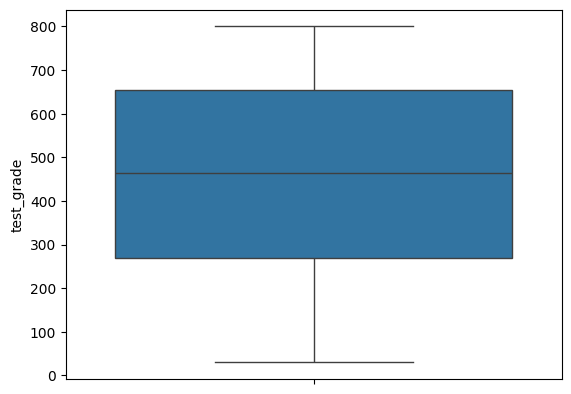

In [10]:
# Verify if we have outliers
# BoxPlot
sns.boxplot(y='test_grade', data=df_grade)

<Axes: >

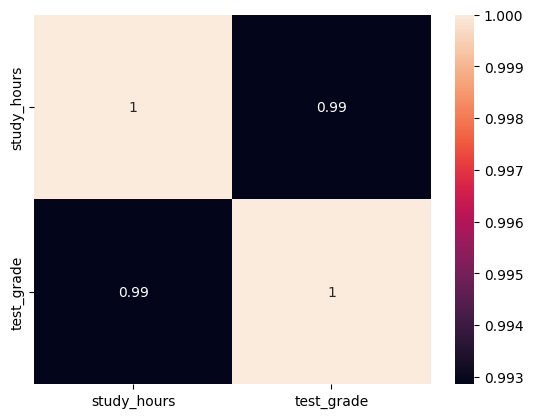

In [11]:
# Verify Correlation – Pearson
sns.heatmap(df_grade.corr('pearson'), annot=True)

<Axes: >

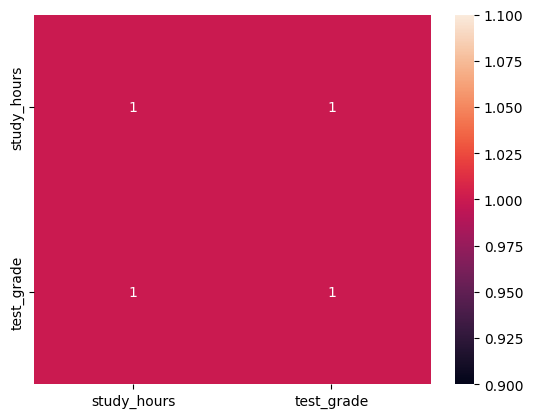

In [12]:
# Verify Correlation – Spearman
sns.heatmap(df_grade.corr('spearman'), annot=True)

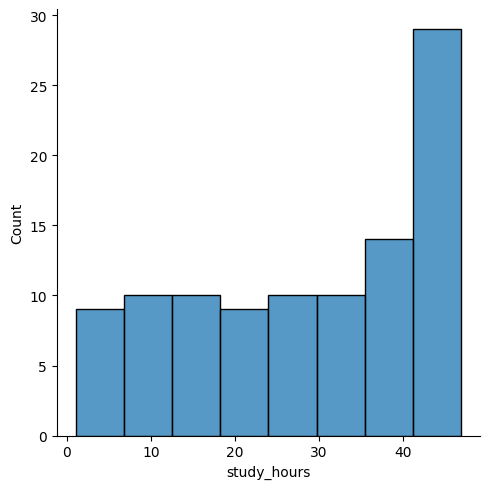

In [13]:
# Histogram - Study Hours
sns.displot(df_grade['study_hours'])

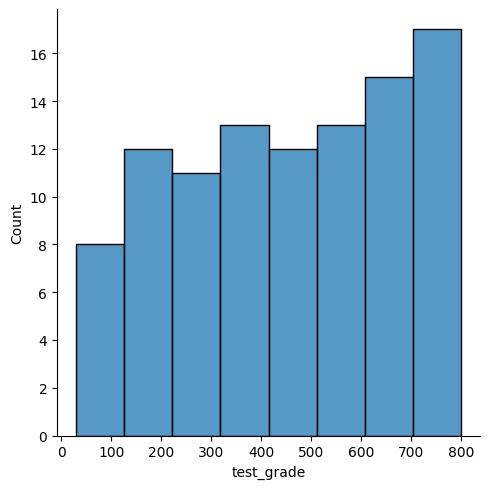

In [14]:
# Histogram - Grades
sns.displot(df_grade['test_grade'])

### Train Model

In [15]:
# Separate data into X and Y
# When we have only one feature, we need to reshape it
X = df_grade['study_hours'].values.reshape(-1, 1)
y = df_grade['test_grade'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=50)

In [16]:
# Intantiate the model to be trained
reg_model = LinearRegression()

In [17]:
# Train model
reg_model.fit(X_train, y_train)

LinearRegression()

In [18]:
# Line equation
# y = aX + b
print("Line equation is = {:4f}x + {:4f}".format(reg_model.coef_[0][0], reg_model.intercept_[0]))

Line equation is = 15.642619x + 8.476601


### Validate Model – Metrics

In [19]:
# Predict values based on test data
y_pred = reg_model.predict(X_test)

In [20]:
# Calculate the R-squared or Coefficient of Determination
# R2 represents the proportion of the variance for a dependent variable that's explained by an independent variable.
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error
r2_score(y_test, y_pred)

0.9828400452912442

In [21]:
# Calculate the MAE (Mean Absolute Error)
# MAE = Average (|y_test - y_pred|)
# The lower the MAE, the better the model
# It is easy to interpret
# MAE is less sensitive to outliers
mean_absolute_error(y_test, y_pred)

22.957470277134608

In [22]:
# Calculate the MSE (Mean Squared Error)
# MSE = Average (y_test - y_pred)^2
# The lower the MSE, the better the model
# It is harder to interpret than MAE
# MSE is more sensitive to outliers and penalizes larger errors
mean_squared_error(y_test, y_pred)

766.9972992416427

In [23]:
# Calculate the RMSE (Squared Root Mean Squared Error)
# RMSE = Average (y_test - y_pred)^2
# The lower the MSE, the better the model
# It is easier to interpret than MSE
# RMSE is more sensitive to outliers and penalizes larger errors
root_mean_squared_error(y_test, y_pred)

27.69471608884342

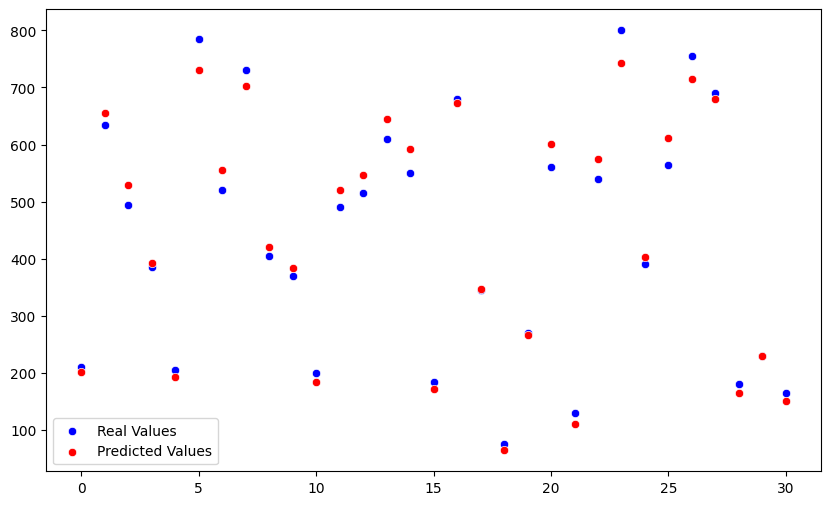

In [25]:
# Graphical Analysis
x_axis = range(len(y_test))
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_axis, y=y_test.reshape(-1), color='blue', label='Real Values')
sns.scatterplot(x=x_axis, y=y_pred.reshape(-1), color='red', label='Predicted Values')
plt.show()

### Residue Analysis

In [26]:
# Calculate residuals
residuals = y_test - y_pred

In [27]:
# Calculate the default residuals (standardization)
# For each element from the residuals (X - average) / standard_deviation
from scipy.stats import zscore
residuals_std = zscore(residuals)

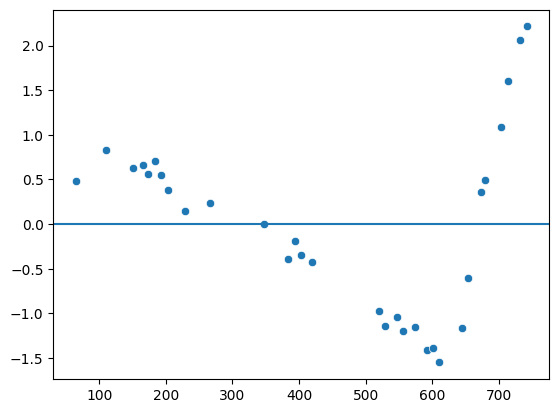

In [28]:
# Verify model linearity
# If the residuals are balanced around -2 and 2, the model is linear

# Verify homogeneity of variance (homoscedasticity)
# If values are balance around the line, the model is homoscedastic
# if we have a tendency or pattern (forming a cone, funnel), the model is heteroscedastic

sns.scatterplot(x=y_pred.reshape(-1), y=residuals_std.reshape(-1))
plt.axhline(y=0)

Text(0, 0.5, 'Residuals in Standard Deviation')

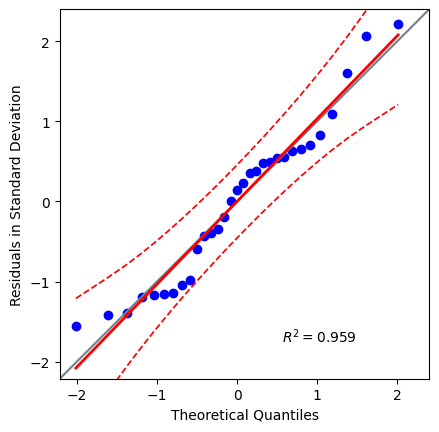

In [29]:
# Check if the residuals are normally distributed
# QQ (Quantile-Quantile) Plot, which evaluates if a sample follows a distribution
# normal
import pingouin as pg
pg.qqplot(residuals_std, dist='norm', confidence=0.95)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Residuals in Standard Deviation')

In [30]:
# Normality Test – Shapiro-Wilk
# H0 – The sample has a normal distribution
# H1 – The sample does not have a normal distribution
# If p-value > 0.05, we fail to reject H0
# If p-value < 0.05, we reject H0
stat_shapiro, p_value_shapiro = shapiro(residuals.reshape(-1))
print("Shapiro-Wilk Test: {} and P-Value: {}".format(stat_shapiro, p_value_shapiro))

Shapiro-Wilk Test: 0.9500532226161755 and P-Value: 0.15663817850304637


In [31]:
# Normality Test – Kolmogorov-Smirnov
# H0 – The sample has a normal distribution
# H1 – The sample does not have a normal distribution
# If p-value > 0.05, we fail to reject H0
# If p-value < 0.05, we reject H0
stat_ks, p_value_ks = kstest(residuals.reshape(-1), 'norm')
print("Shapiro-Wilk Test: {} and P-Value: {}".format(stat_ks, p_value_ks))

Shapiro-Wilk Test: 0.48355808450512827 and P-Value: 3.395368995814077e-07
